In [ ]:
from google.colab import files
uploaded = files.upload()

Saving immigrants and emigrants by country of citizenship.xls to immigrants and emigrants by country of citizenship.xls


In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('immigrants and emigrants by country of citizenship.xls')
df.head(5)

,Region,Im.Total,Im.Male,Im.Female,Em.Total,Em.Male,Em.Female,Net Migration,Age,Im.Total_age,Em.Total_age
0,Total,316456,171395,145061,714579,394186,320393,-398123,Total_age,316456.0,714579.0
1,Turkish citizens,101677,61628,40049,291377,166007,125370,-189700,0-4,16577.0,24463.0
2,Foreign nationals,214779,109767,105012,423202,228179,195023,-208423,5-9,14607.0,39322.0
3,Russian Federation,28314,14346,13968,71956,40270,31686,-43642,10-14,12901.0,35870.0
4,Azerbaijan,17676,9486,8190,12803,7170,5633,4873,15-19,32444.0,40579.0


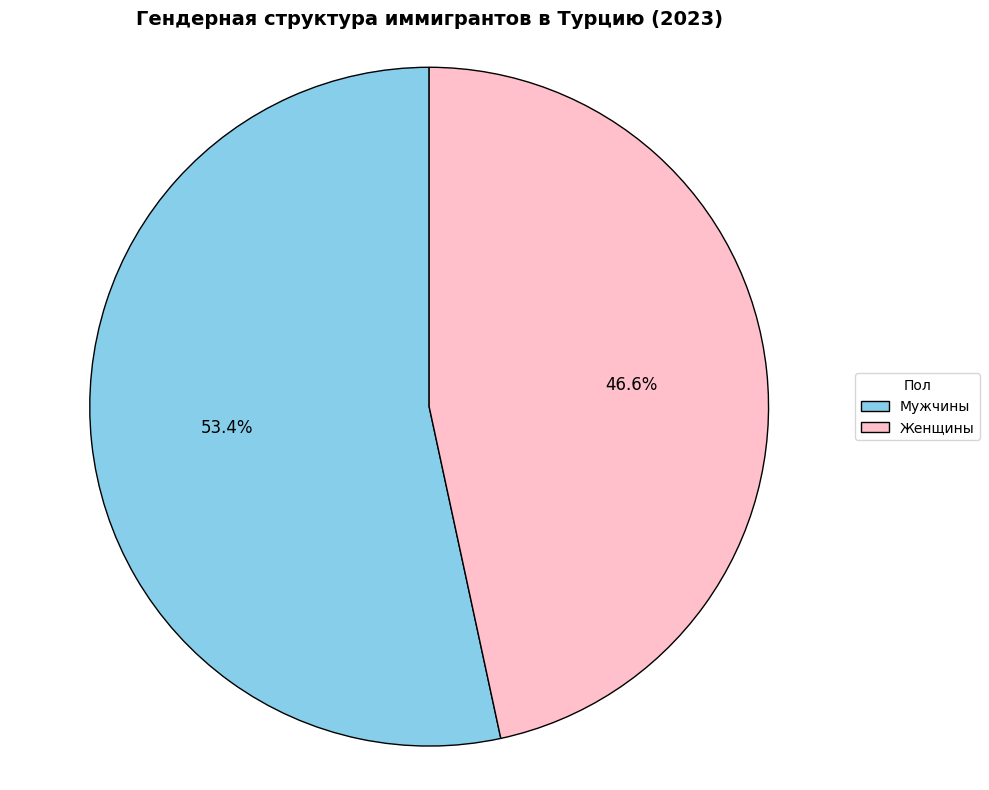

In [ ]:
# Суммируем мужчин и женщин по всем странам (иммигранты)
total_male = df['Im.Male'].sum()
total_female = df['Im.Female'].sum()

# Данные
labels = ['Мужчины', 'Женщины']
sizes = [total_male, total_female]
colors = ['skyblue', 'pink']

# Круговая диаграмма
plt.figure(figsize=(10, 8))

wedges, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor='black', linewidth=1),
    textprops={'fontsize': 12}
)

# Легенда справа
plt.legend(wedges, labels, title="Пол", loc="center left", bbox_to_anchor=(1, 0.5))

# Заголовок
plt.title('Гендерная структура иммигрантов в Турцию (2023)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

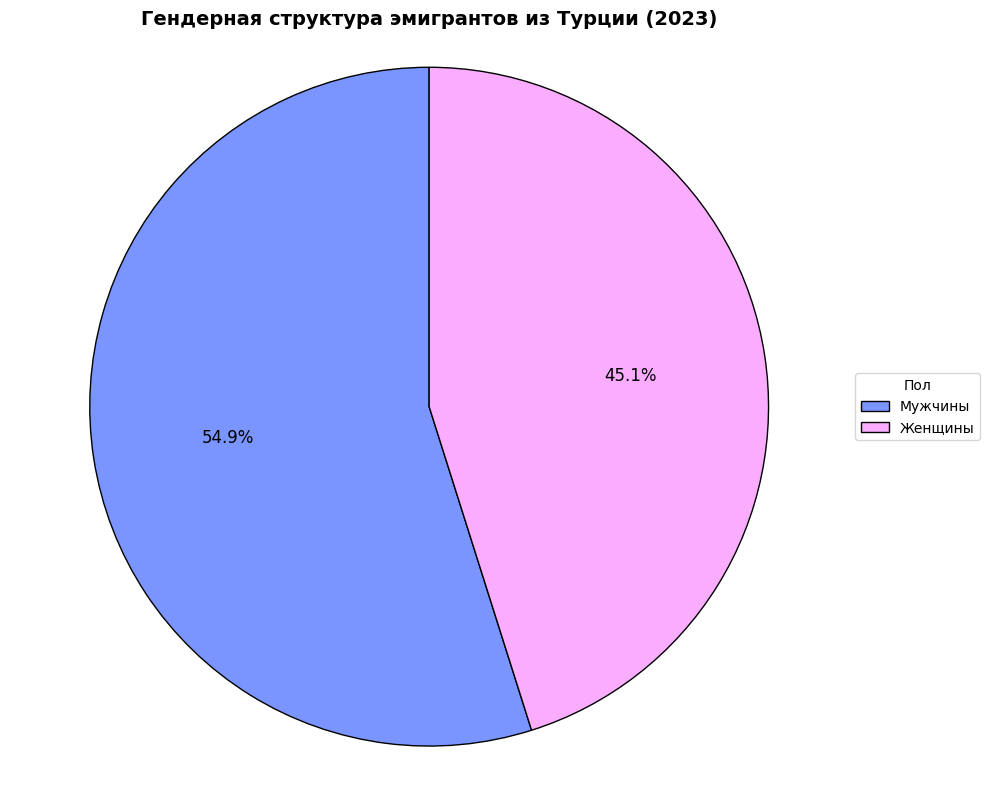

In [ ]:
# Суммируем мужчин и женщин по всем странам (эмигранты)
total_male_em = df['Em.Male'].sum()
total_female_em = df['Em.Female'].sum()

# Данные
labels = ['Мужчины', 'Женщины']
sizes = [total_male_em, total_female_em]
colors = ['#7a95ff', '#faadff']

# Круговая диаграмма
plt.figure(figsize=(10, 8))

wedges, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor='black', linewidth=1),
    textprops={'fontsize': 12}
)

# Легенда — справа от графика
plt.legend(wedges, labels, title="Пол", loc="center left", bbox_to_anchor=(1, 0.5))

# Заголовок
plt.title('Гендерная структура эмигрантов из Турции (2023)', fontsize=14, fontweight='bold')
plt.axis('equal')  # чтобы круг был круглым
plt.tight_layout()
plt.show()

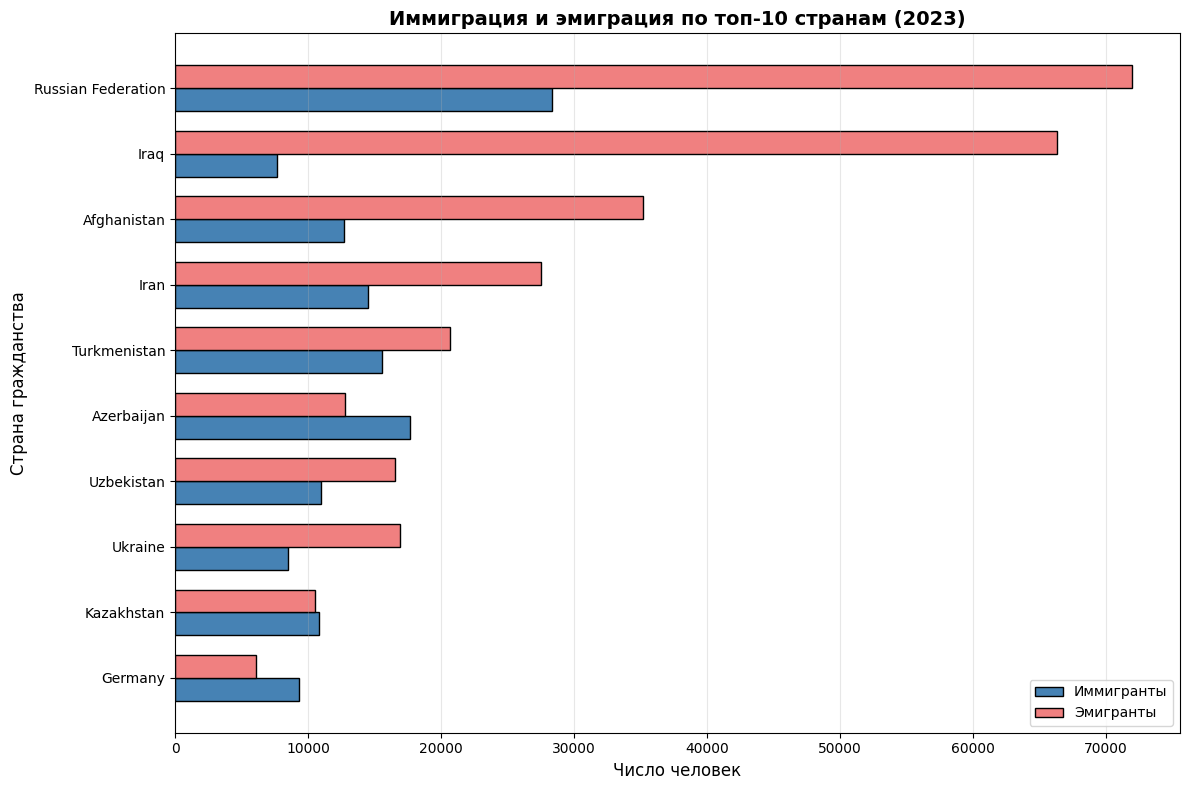

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Подготовка данных ---
exclude = ['Total', 'Turkish citizens', 'Foreign nationals']
df_countries = df[~df['Region'].isin(exclude)].copy()

# Берём топ-10 стран по ОБЩЕМУ миграционному потоку (иммиграция + эмиграция)
df_countries['Total_Flow'] = df_countries['Im.Total'] + df_countries['Em.Total']
top10 = df_countries.nlargest(10, 'Total_Flow')
top10 = top10.sort_values('Total_Flow', ascending=True)

countries = top10['Region']
immigrants = top10['Im.Total']
emigrants = top10['Em.Total']

# --- Построение графика ---
y_pos = np.arange(len(countries))
width = 0.35

plt.figure(figsize=(12, 8))

# Два набора столбцов
bars1 = plt.barh(y_pos - width/2, immigrants, width, label='Иммигранты', color='steelblue', edgecolor='black')
bars2 = plt.barh(y_pos + width/2, emigrants,   width, label='Эмигранты',   color='lightcoral', edgecolor='black')

# Подписи осей и заголовок
plt.yticks(y_pos, countries)
plt.title('Иммиграция и эмиграция по топ-10 странам (2023)', fontsize=14, fontweight='bold')
plt.xlabel('Число человек', fontsize=12)
plt.ylabel('Страна гражданства', fontsize=12)

# Легенда
plt.legend()

# Сетка для удобства чтения
plt.grid(True, axis='x', alpha=0.3)

# Подгонка отступов
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

columns_to_test = ["Im.Total", "Em.Total", "Im.Male", "Em.Male"]

print("=== Shapiro–Wilk Test for Normality ===\n")
for col in columns_to_test:
    stat, p = shapiro(df[col])
    print(f"{col}: W={stat:.4f}, p-value={p:.4f}")


=== Shapiro–Wilk Test for Normality ===

Im.Total: W=0.2020, p-value=0.0000
Em.Total: W=0.2032, p-value=0.0000
Im.Male: W=0.2016, p-value=0.0000
Em.Male: W=0.2030, p-value=0.0000


In [ ]:
from scipy.stats import spearmanr

stat, p = spearmanr(df["Im.Total"], df["Em.Total"])

print("=== Spearman Rank Correlation ===\n")
print(f"Spearman rho = {stat:.4f}, p-value = {p:.4f}")



=== Spearman Rank Correlation ===

Spearman rho = 0.9275, p-value = 0.0000


In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df["Im.Male"], df["Im.Female"], alternative='two-sided')

print("=== Mann–Whitney U Test (Im.Male vs Im.Female) ===\n")
print(f"U = {stat:.4f}, p-value = {p:.4f}")


=== Mann–Whitney U Test (Im.Male vs Im.Female) ===

U = 5756.5000, p-value = 0.4227


In [ ]:
import pandas as pd

# ----- Step 1: Example mapping for main groups (looks like student work) -----
region_map = {
    "Europe": ["Germany", "France", "Italy", "Spain", "United Kingdom", "Sweden", "Norway", "Austria", "Netherlands"],
    "Asia": ["China", "India", "Japan", "South Korea", "Saudi Arabia", "Iran", "Iraq", "Syria", "Pakistan", "Israel"],
    "Africa": ["Egypt", "Morocco", "Algeria", "Tunisia", "Nigeria", "Sudan", "Ethiopia", "Somalia", "Cameroon"],
    "America": ["United States", "Canada", "Brazil", "Mexico", "Colombia"]
}

# ----- Step 2: List of Post-USSR countries (ONLY those present in dataset) -----
post_ussr_all = ["Russia", "Russian Federation", "Ukraine", "Belarus", "Kazakhstan", "Uzbekistan",
                  "Turkmenistan", "Kyrgyzstan", "Tajikistan", "Moldova", "Azerbaijan", "Georgia", "Armenia", "Lithuania",
                  "Latvia", "Estonia"]

post_ussr = [country for country in post_ussr_all if country in df["Region"].unique()]

# ----- Step 3: Function to assign region group -----
def assign_region_group(country):
    # Post-USSR has priority
    if country in post_ussr:
        return "PostUSSR"

    # Assign main groups if found in mapping
    for group, country_list in region_map.items():
        if country in country_list:
            return group

    # Turkish citizens & Foreign nationals go to Other (your choice #3)
    if country in ["Turkish citizens", "Foreign nationals"]:
        return "Other"

    # Everything else → Other
    return "Other"

# ----- Step 4: Create new column with groups -----
df["Region.Group"] = df["Region"].apply(assign_region_group)

df["Region.Group"].value_counts()


,count
Region.Group,
Other,60
PostUSSR,11
Asia,10
Europe,9
Africa,9
America,5


In [ ]:
from scipy.stats import kruskal

# Group data by Region.Group
groups = df.groupby("Region.Group")

# Prepare data for Kruskal-Wallis
im_groups = [group["Im.Total"].dropna() for name, group in groups]
em_groups = [group["Em.Total"].dropna() for name, group in groups]

print("=== Kruskal–Wallis Test for Im.Total between Region Groups ===")
stat_im, p_im = kruskal(*im_groups)
print(f"Statistic = {stat_im:.4f}, p-value = {p_im:.4f}")


print("\n=== Kruskal–Wallis Test for Em.Total between Region Groups ===")
stat_em, p_em = kruskal(*em_groups)
print(f"Statistic = {stat_em:.4f}, p-value = {p_em:.4f}")




=== Kruskal–Wallis Test for Im.Total between Region Groups ===
Statistic = 33.2742, p-value = 0.0000

=== Kruskal–Wallis Test for Em.Total between Region Groups ===
Statistic = 32.7346, p-value = 0.0000


In [ ]:
from scipy.stats import kendalltau

# Критерий Кендалла для Im.Total и Em.Total
tau, p_value = kendalltau(df['Im.Total'], df['Em.Total'])

print("=== Kendall Tau Correlation ===")
print(f"Kendall tau = {tau:.4f}, p-value = {p_value:.4f}")



=== Kendall Tau Correlation ===
Kendall tau = 0.7370, p-value = 0.0000
→ Отвергаем H0: Существует статистически значимая зависимость между Im.Total и Em.Total.


In [ ]:
from scipy.stats import median_test

# Фильтруем данные (исключаем Total, т.к. это агрегат, и разделяем на две группы)
group1 = df[df['Region'] == 'Turkish citizens']['Im.Total']
group2 = df[df['Region'] == 'Foreign nationals']['Im.Total']

stat, p_value, med, tbl = median_test(group1, group2)

print("\n=== Mood’s Median Test for Im.Total (Turkish vs Foreign) ===")
print(f"Statistic = {stat:.4f}, p-value = {p_value:.4f}")
print(f"Overall Median = {med}")





=== Mood’s Median Test for Im.Total (Turkish vs Foreign) ===
Statistic = 0.0000, p-value = 1.0000
Overall Median = 158228.0
→ Не отвергаем H0: Нет статистически значимой разницы между медианами Im.Total.


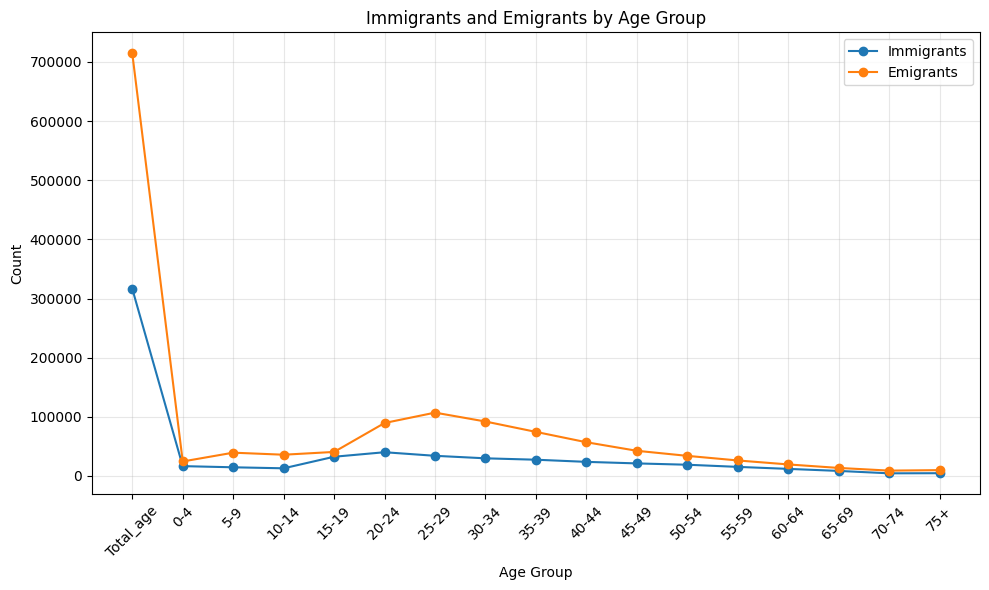

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['Age'].astype(str), df['Im.Total_age'], marker='o', label='Immigrants')
plt.plot(df['Age'].astype(str), df['Em.Total_age'], marker='o', label='Emigrants')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Immigrants and Emigrants by Age Group")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Более надежный способ с обработкой ошибок
df_age_clean['Im.Total_age'] = pd.to_numeric(df_age_clean['Im.Total_age'].astype(str).str.replace(' ', ''), errors='coerce').fillna(0).astype(int)
df_age_clean['Em.Total_age'] = pd.to_numeric(df_age_clean['Em.Total_age'].astype(str).str.replace(' ', ''), errors='coerce').fillna(0).astype(int)


In [ ]:
from scipy.stats import shapiro

# Проверка нормальности для иммиграции
stat_im, p_im = shapiro(df_age_clean['Im.Total_age'])
print("Shapiro–Wilk Test for Immigrants: W=%.4f, p-value=%.4f" % (stat_im, p_im))

# Проверка нормальности для эмиграции
stat_em, p_em = shapiro(df_age_clean['Em.Total_age'])
print("Shapiro–Wilk Test for Emigrants:   W=%.4f, p-value=%.4f" % (stat_em, p_em))


Shapiro–Wilk Test for Immigrants: W=0.4301, p-value=0.0000
Shapiro–Wilk Test for Emigrants:   W=0.4006, p-value=0.0000


In [ ]:
from scipy.stats import spearmanr

# Закодируем возраст как числовой индекс
age_numeric = range(len(df_age_clean))

# Спирмен для иммиграции
rho_im, p_im = spearmanr(age_numeric, df_age_clean['Im.Total_age'])
print("Spearman Correlation (Age vs Immigrants): rho=%.4f, p-value=%.4f" % (rho_im, p_im))

# Спирмен для эмиграции
rho_em, p_em = spearmanr(age_numeric, df_age_clean['Em.Total_age'])
print("Spearman Correlation (Age vs Emigrants):  rho=%.4f, p-value=%.4f" % (rho_em, p_em))


Spearman Correlation (Age vs Immigrants): rho=-0.6277, p-value=0.0000
Spearman Correlation (Age vs Emigrants):  rho=-0.6277, p-value=0.0000


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving immigrants and emigrants by citizenship and provinces.xls to immigrants and emigrants by citizenship and provinces.xls


In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('immigrants and emigrants by citizenship and provinces.xls')

In [ ]:
df.head()

,Year,Provinces,Total_population,Turkish citizens,Forein nationals,Im.Total,Im.Turkish citizens,Im.Forein nationals,Em.Total,Em.Turkish citizens,Em.Forein nationals,Net migration
0,2023.0,Toplam-Total,85372377,83801834,1570543,316456,101677,214779,714579,291377,423202,-398123
1,NaN,Adana,2270298,2257602,12696,3454,2085,1369,9861,6257,3604,-6407
2,NaN,Adıyaman,604978,603375,1603,792,697,95,2643,2486,157,-1851
3,NaN,Afyonkarahisar,751344,740074,11270,3251,2266,985,5170,3216,1954,-1919
4,NaN,Ağrı,511238,510024,1214,669,380,289,1530,1235,295,-861


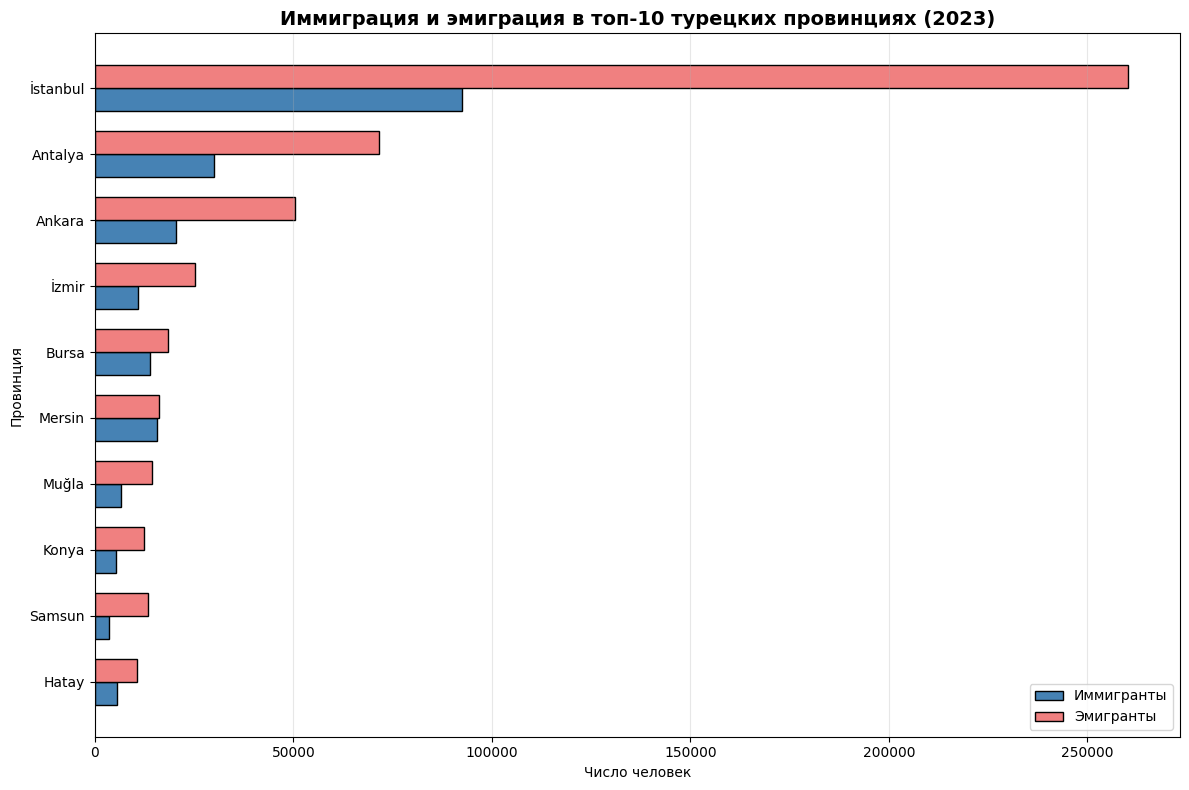

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Исключаем строку 'Toplam-Total' и вычисляем потоки вручную
df = df[df['Provinces'] != 'Toplam-Total'].copy()
df['Im_Total'] = df['Im.Turkish citizens'] + df['Im.Forein nationals']
df['Em_Total'] = df['Em.Turkish citizens'] + df['Em.Forein nationals']
df['Total_Flow'] = df['Im_Total'] + df['Em_Total']

# Берём топ-10 провинций и сортируем по возрастанию для графика
top10 = df.nlargest(10, 'Total_Flow').sort_values('Total_Flow', ascending=True)

# Подготовка данных
provinces = top10['Provinces']
immigrants = top10['Im_Total']
emigrants = top10['Em_Total']

# Построение графика
y_pos = np.arange(len(provinces))
width = 0.35

plt.figure(figsize=(12, 8))
plt.barh(y_pos - width/2, immigrants, width, label='Иммигранты', color='steelblue', edgecolor='black')
plt.barh(y_pos + width/2, emigrants, width, label='Эмигранты', color='lightcoral', edgecolor='black')

plt.yticks(y_pos, provinces)
plt.title('Иммиграция и эмиграция в топ-10 турецких провинциях (2023)', fontsize=14, fontweight='bold')
plt.xlabel('Число человек')
plt.ylabel('Провинция')
plt.legend()
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

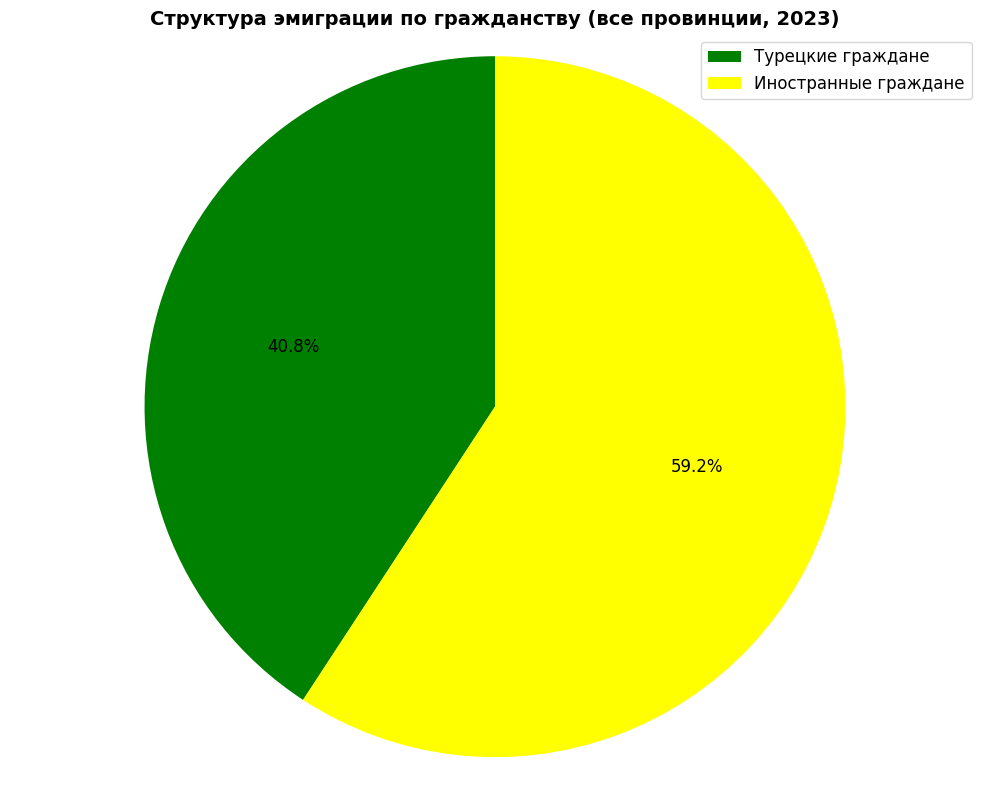

In [ ]:
import matplotlib.pyplot as plt

# Исключаем итоговую строку
df_filtered = df[df['Provinces'] != 'Toplam-Total']

# Суммируем эмиграцию по категориям
total_em_turkish = df_filtered['Em.Turkish citizens'].sum()
total_em_foreign = df_filtered['Em.Forein nationals'].sum()

# Данные
sizes = [total_em_turkish, total_em_foreign]
labels = ['Турецкие граждане', 'Иностранные граждане']
colors = ['green', 'yellow']

# Построение
plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

# Легенда вместо подписей на сегментах
plt.legend(labels, loc='upper right', fontsize=12)

plt.title('Структура эмиграции по гражданству (все провинции, 2023)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

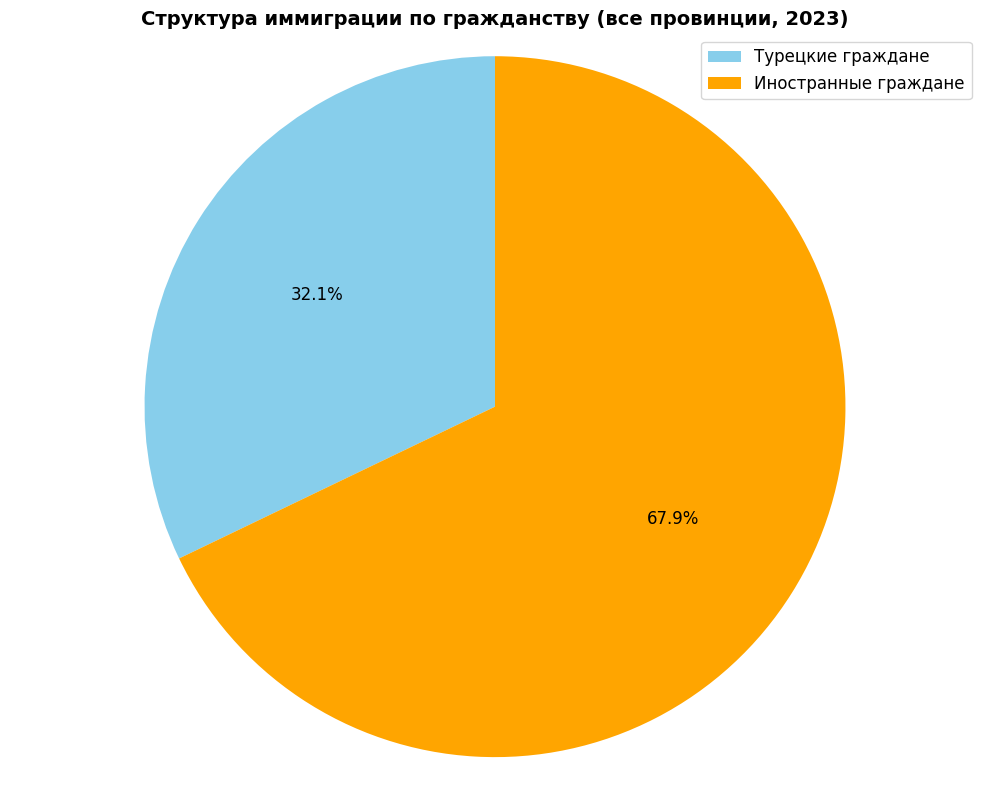

In [ ]:
import matplotlib.pyplot as plt

# Исключаем итоговую строку
df_filtered = df[df['Provinces'] != 'Toplam-Total']

# Суммируем эмиграцию по категориям
total_em_turkish = df_filtered['Im.Turkish citizens'].sum()
total_em_foreign = df_filtered['Im.Forein nationals'].sum()

# Данные
sizes = [total_em_turkish, total_em_foreign]
labels = ['Турецкие граждане', 'Иностранные граждане']
colors = ['skyblue', 'orange']

# Построение
plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

# Легенда вместо подписей на сегментах
plt.legend(labels, loc='upper right', fontsize=12)

plt.title('Структура иммиграции по гражданству (все провинции, 2023)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

columns_to_test = ["Im.Total", "Em.Total", "Im.Turkish citizens", "Em.Turkish citizens"]

print("=== Shapiro–Wilk Test for Normality ===\n")
for col in columns_to_test:
    stat, p = shapiro(df[col])
    print(f"{col}: W={stat:.4f}, p-value={p:.4f}")

=== Shapiro–Wilk Test for Normality ===

Im.Total: W=0.1789, p-value=0.0000
Em.Total: W=0.1805, p-value=0.0000
Im.Turkish citizens: W=0.1657, p-value=0.0000
Em.Turkish citizens: W=0.1746, p-value=0.0000


In [ ]:
from scipy.stats import spearmanr

stat, p = spearmanr(df["Im.Total"], df["Em.Total"])

print("=== Spearman Rank Correlation ===\n")
print(f"Spearman rho = {stat:.4f}, p-value = {p:.4f}")

=== Spearman Rank Correlation ===

Spearman rho = 0.9275, p-value = 0.0000


In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df["Im.Forein nationals"], df["Im.Turkish citizens"], alternative='two-sided')

print("=== Mann–Whitney U Test (Im.Forein nationals vs Im.Turkish citizens) ===\n")
print(f"U = {stat:.4f}, p-value = {p:.4f}")


=== Mann–Whitney U Test (Im.Forein nationals vs Im.Turkish citizens) ===

U = 3514.5000, p-value = 0.6171


In [ ]:
# Определим границы по Total_population
q1 = df['Total_population'].quantile(0.33)
q2 = df['Total_population'].quantile(0.66)

df['size_group'] = pd.cut(
    df['Total_population'],
    bins=[0, q1, q2, float('inf')],
    labels=['Малые', 'Средние', 'Крупные']
)

In [ ]:
from scipy.stats import kruskal

# Группируем по размеру
small = df[df['size_group'] == 'Малые']['Im.Total']
medium = df[df['size_group'] == 'Средние']['Im.Total']
large = df[df['size_group'] == 'Крупные']['Im.Total']

# Проверяем, что каждая группа имеет хотя бы 5 наблюдений
if len(small) >= 5 and len(medium) >= 5 and len(large) >= 5:
    stat, p_value = kruskal(small, medium, large)
    print(f"H = {stat:.2f}, p = {p_value:.4f}")
else:
    print("Недостаточно данных в одной из групп")

H = 43.12, p = 0.0000


In [ ]:
from scipy.stats import kendalltau

# Критерий Кендалла для Im.Total и Em.Total
tau, p_value = kendalltau(df['Im.Total'], df['Em.Total'])

print("=== Kendall Tau Correlation ===")
print(f"Kendall tau = {tau:.4f}, p-value = {p_value:.4f}")

=== Kendall Tau Correlation ===
Kendall tau = 0.7839, p-value = 0.0000


In [ ]:
# Создаём две группы
group_positive = df[df['Net migration'] > 0]['Im.Total']
group_negative = df[df['Net migration'] < 0]['Im.Total']

# Убедимся, что обе группы не пустые
print(f"Положительная: {len(group_positive)} провинций")
print(f"Отрицательная: {len(group_negative)} провинций")

Положительная: 4 провинций
Отрицательная: 78 провинций


In [ ]:
from scipy.stats import median_test

# Применяем тест
stat, p_value, overall_median, contingency_table = median_test(
    group_positive,
    group_negative
)

print("\n=== Mood’s Median Test: Положительная vs Отрицательная чистая миграция ===")
print(f"Статистика = {stat:.4f}")
print(f"p-value = {p_value:.4f}")
print(f"Общая медиана = {overall_median}")



=== Mood’s Median Test: Положительная vs Отрицательная чистая миграция ===
Статистика = 0.2628
p-value = 0.6082
Общая медиана = 1430.0
